# **Importing libraries and reading in the data.**

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
daily_visitors_data=pd.read_csv("https://tinyurl.com/ChrisCoDV/001190624/VenueDailyVisitors.csv",index_col=0)
print(daily_visitors_data)

            VRD  XFP  SJU  YDI  ZJB  CWN  XJT  BQV  YRU  VLS  ...  BEY  BKI  \
Date                                                          ...             
2019-01-01   58   70  558    0    0  242   56    0   70   68  ...  186    0   
2019-01-02   60   69  540    0    0  221   68    0   56   46  ...  255    0   
2019-01-03   59   57  493    0    0  184   71    0   65   76  ...  187    0   
2019-01-04   68   76  419    0    0  146   84    0   63   66  ...  136    0   
2019-01-05   54   73  387    0    0  147   89    0   63   83  ...  197    0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2019-12-27   67   79  352   84   56  138   83   76   73   71  ...  163  136   
2019-12-28   62   84  411    0  108  156  119   87   67   55  ...   91   97   
2019-12-29   54   79  447  100   87  197  109   69   68   60  ...  195   90   
2019-12-30   68   76  549    0   45  235   81   68   68   59  ...  242  123   
2019-12-31   63   82  551   80   61  235   70   50  

# **A Bar Chart exploring the sorted total visitors throughout 2019**


RDA    180709
SJU    172844
PXI    164887
SPF    155610
PDT     98307
QJL     86680
QRY     84911
CWN     71793
BEY     68416
CQC     58995
DKS     55541
AWF     54719
XLA     33398
WXV     33138
ZFX     31018
WDZ     30701
TLJ     30366
WRL     29806
WFI     29348
XJT     29080
dtype: int64


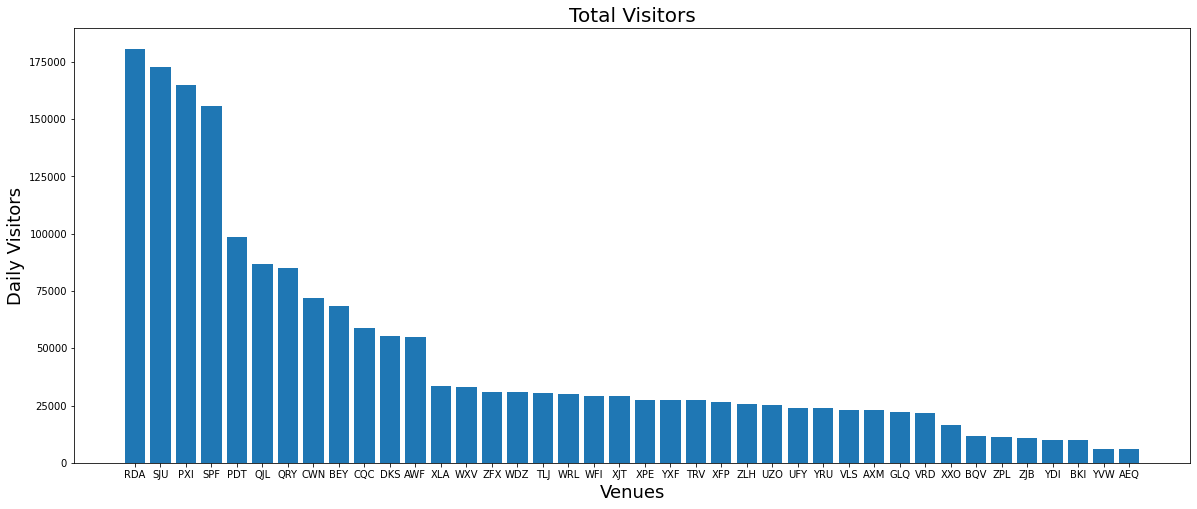

In [2]:
data = daily_visitors_data.reindex(daily_visitors_data.sum().sort_values(ascending=False).index, axis=1)
print(data.sum().head(20))

plt.figure(figsize=(20, 8))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.sum(), align='center')
plt.xticks(x_pos, data.columns)
plt.xlabel('Venues', fontsize=18)
plt.ylabel('Daily Visitors', fontsize=18)
plt.title('Total Visitors', fontsize=20)
plt.show()

### **Categorizing the data into High Volume, Medium Volume, Low Volume, and Very Low Volume by selecting specific groups of venues.**

High: ['RDA', 'SJU', 'PXI', 'SPF']
Medium: ['PDT', 'QJL', 'QRY', 'CWN', 'BEY', 'CQC', 'DKS', 'AWF']
Low: ['XLA', 'WXV', 'ZFX', 'WDZ', 'TLJ', 'WRL', 'WFI', 'XJT', 'XPE', 'YXF', 'TRV', 'XFP', 'ZLH']
Very Low: ['UZO', 'UFY', 'YRU', 'VLS', 'AXM', 'GLQ', 'VRD', 'XXO', 'BQV', 'ZPL', 'ZJB', 'YDI', 'BKI', 'YVW', 'AEQ']


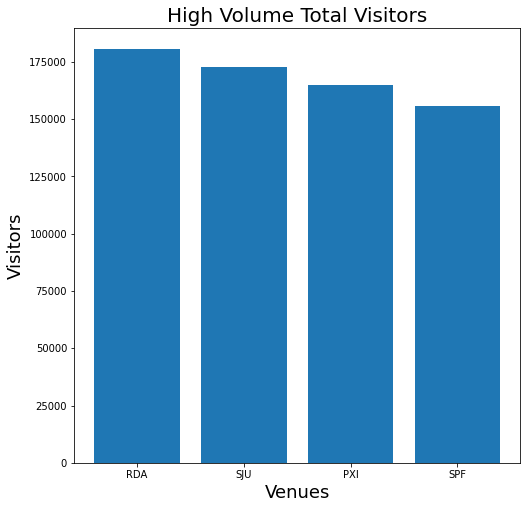

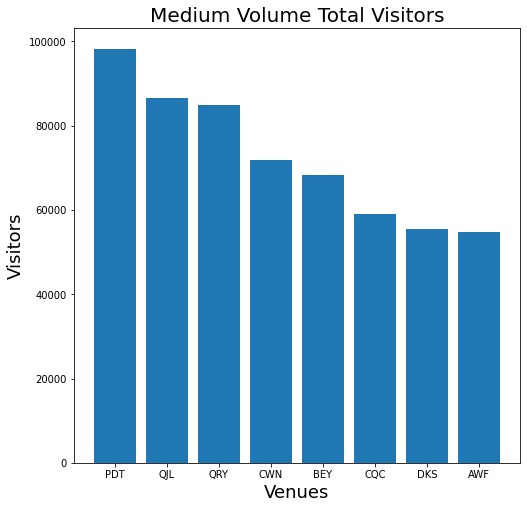

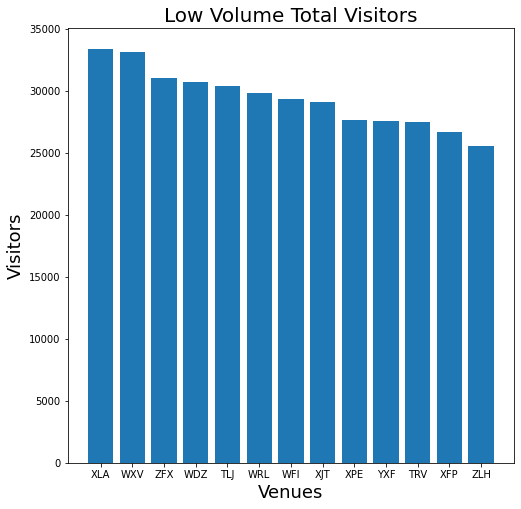

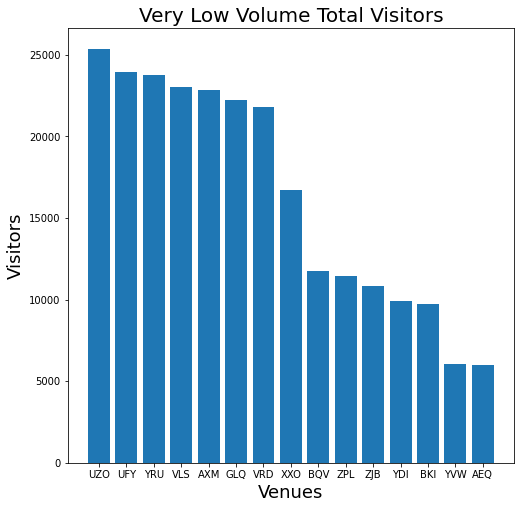

In [3]:
categories = ['High', 'Medium', 'Low','Very Low']
categories_selected = [[] for i in range(len(categories))]
for name in data.columns:
    total_visitors = data[name].sum()
    if total_visitors > 150000:
        category = 0
    elif total_visitors > 54000:
        category = 1
    elif total_visitors > 25500:
        category = 2
    else:
        category = 3
    categories_selected[category].append(name)
    #print('Venue ' + name + ' is ' + categories[category] + ' volume')

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))

for i, selected in enumerate(categories_selected):
    plt.figure(figsize=(8, 8))
    x_pos = np.arange(len(data[selected].columns))
    plt.bar(x_pos, data[selected].sum(), align='center')
    plt.xticks(x_pos, data[selected].columns)
    plt.xlabel('Venues', fontsize=18)
    plt.ylabel('Visitors', fontsize=18)
    plt.title(categories[i] + ' Volume Total Visitors', fontsize=20)
    plt.show()

# **Area Plot was used to get answers to more detailed questions such as at which times of the year more visitors are received or to determine the places that are not active during certain periods of the year for very low volume venues.**

            RDA  SJU  PXI  SPF  PDT  QJL  QRY  CWN  BEY  CQC  ...  GLQ  VRD  \
Date                                                          ...             
2019-01-01  578  558  549  508  341  274  282  242  186  209  ...   59   58   
2019-01-02  512  540  463  458  294  319  271  221  255  186  ...   68   60   
2019-01-03  433  493  422  413  204  177  206  184  187  146  ...   61   59   
2019-01-04  423  419  295  311  189  180  174  146  136  112  ...   73   68   
2019-01-05  255  387  370  342  278  210  192  147  197  102  ...   64   54   

            XXO  BQV  ZPL  ZJB  YDI  BKI  YVW  AEQ  
Date                                                
2019-01-01   67    0   67    0    0    0    0    0  
2019-01-02   74    0   54    0    0    0    0    0  
2019-01-03   93    0   55    0    0    0    0    0  
2019-01-04   81    0   45    0    0    0    0    0  
2019-01-05   78    0   62    0    0    0    0    0  

[5 rows x 40 columns]


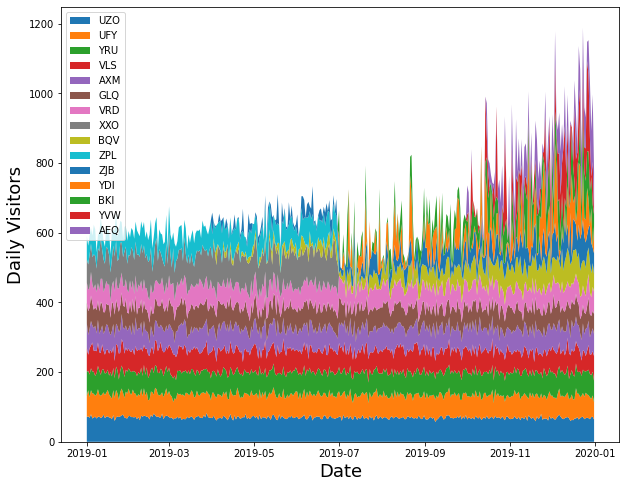

In [4]:
data = daily_visitors_data.reindex(daily_visitors_data.sum().sort_values(ascending=False).index, axis=1)
print(data.head())

selected = ['UZO', 'UFY', 'YRU', 'VLS', 'AXM', 'GLQ', 'VRD', 'XXO', 'BQV', 'ZPL', 'ZJB', 'YDI', 'BKI', 'YVW', 'AEQ']
data.index=pd.to_datetime(data.index)

plt.figure(figsize=(10, 8))
# data.plot.area(figsize=(8, 8))
plt.stackplot(data.index, data[selected].transpose())
plt.xlabel('Date', fontsize=18)
plt.ylabel('Daily Visitors', fontsize=18)
plt.title('', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

# **Data on average age of visitors at each venue.**

In [39]:
age_data=pd.read_csv("https://tinyurl.com/ChrisCoDV/001190624/VenueAge.csv ",index_col=0)
print(age_data.head())

     Avg age (yrs)
Id                
VRD             52
XFP             55
SJU             47
YDI             49
ZJB             43


# **Data on maximum distance (miles) that visitors have travelled to each venue.**

In [40]:
distance_data=pd.read_csv("https://tinyurl.com/ChrisCoDV/001190624/VenueDistance.csv  ",index_col=0)
print(distance_data.head())

     Max travel distance (mls)
Id                            
VRD                          9
XFP                          5
SJU                         48
YDI                          4
ZJB                          5


# **Data on average time (mins) that visitors spend at each venue.**

In [41]:
duration_data=pd.read_csv("https://tinyurl.com/ChrisCoDV/001190624/VenueDuration.csv ",index_col=0)
print(duration_data.head())

     Avg visit duration (mins)
Id                            
VRD                        143
XFP                        117
SJU                        132
YDI                        103
ZJB                         97


# **Data on percentage of visitors identifying as female at each venue.**

In [42]:
gender_data=pd.read_csv("https://tinyurl.com/ChrisCoDV/001190624/VenueGender.csv",index_col=0)
print(gender_data.head())

     Proportion Female (%)
Id                        
VRD                     57
XFP                     56
SJU                     53
YDI                     42
ZJB                     41


# **Data onaverage spend (£) by visitors at each venue.**


In [43]:
spend_data=pd.read_csv("https://tinyurl.com/ChrisCoDV/001190624/VenueSpend.csv",index_col=0)
print(spend_data.head())

     Avg spend (£)
Id                
VRD             28
XFP             28
SJU             28
YDI             32
ZJB             31


# **Constructing a dataframe containing summary data and also including the total visitors over the year calculated from the daily visitors data.**

In [44]:
summary_data=pd.DataFrame(index=daily_visitors_data.columns)
summary_data['Age'] = age_data.values
summary_data['Distance'] = distance_data.values
summary_data['Total Visitors'] = daily_visitors_data.sum().values
summary_data['Spend']=spend_data.values
summary_data['Duration'] = duration_data.values
summary_data['Gender'] = gender_data.values
print(summary_data.head())
print(summary_data.describe())

     Age  Distance  Total Visitors  Spend  Duration  Gender
VRD   52         9           21798     28       143      57
XFP   55         5           26684     28       117      56
SJU   47        48          172844     28       132      53
YDI   49         4            9934     32       103      42
ZJB   43         5           10828     31        97      41
             Age   Distance  Total Visitors      Spend    Duration     Gender
count  40.000000  40.000000       40.000000  40.000000   40.000000  40.000000
mean   40.400000  13.450000    47013.625000  22.000000   96.875000  51.150000
std    10.386875  13.876654    46771.248842   7.327504   21.744657   6.010888
min    21.000000   2.000000     6013.000000   9.000000   62.000000  41.000000
25%    31.750000   4.750000    22685.750000  16.500000   81.500000  45.750000
50%    42.000000   8.500000    28345.500000  21.000000   92.500000  52.000000
75%    50.000000  14.000000    56404.500000  28.000000  110.250000  56.000000
max    55.000000

# **A Correlation heatmap that showing the relationship between “Age”, ”Distance”, ”Total Visitors”, ”Spend”, ”Duration”, and “Gender” categories.**

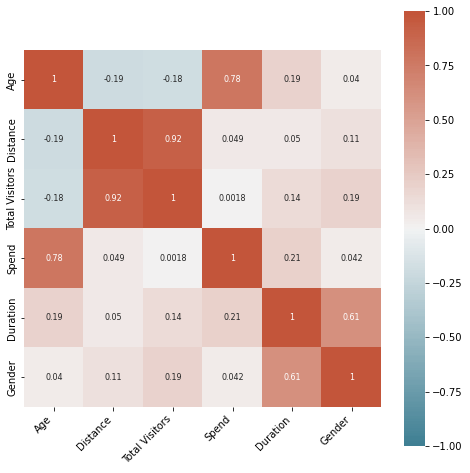

In [45]:
#more distance more visitors??(lec4)(there is only one strıng corr between distance and total visitors)
#correlation for summary data--can identify some strongly correlated ...(***1)
plt.figure(figsize=(8, 8))
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# **A Scatter Plot of "Age" and "Spend". It is aimed to examine the connection between "Age" and "Spend" categories in detail.**

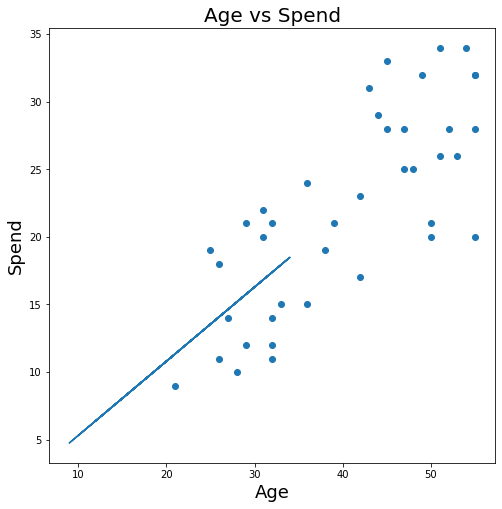

In [46]:
plt.figure(figsize=(8, 8))
plt.scatter(summary_data['Age'], summary_data['Spend'])
z = np.polyfit(summary_data['Age'], summary_data['Spend'], 1)
trend = np.poly1d(z)
plt.plot(summary_data['Spend'],trend(summary_data['Spend']))
plt.title('Age vs Spend', fontsize=20)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spend', fontsize=18)
plt.show()

In [47]:
!pip install -U matplotlib pandas

In [48]:
normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

          Age  Distance  Total Visitors     Spend  Duration    Gender
VRD  0.945455  0.150000        0.120625  0.823529  0.993056  0.950000
XFP  1.000000  0.083333        0.147663  0.823529  0.812500  0.933333
SJU  0.854545  0.800000        0.956477  0.823529  0.916667  0.883333
YDI  0.890909  0.066667        0.054972  0.941176  0.715278  0.700000
ZJB  0.781818  0.083333        0.059920  0.911765  0.673611  0.683333


# **A Radar Plot of High Volume Venues Represented with Normalised Data to compare all categories of venues 'Age', 'Gender', 'Total Visitors', 'Spend', 'Duration', 'Distance'.**

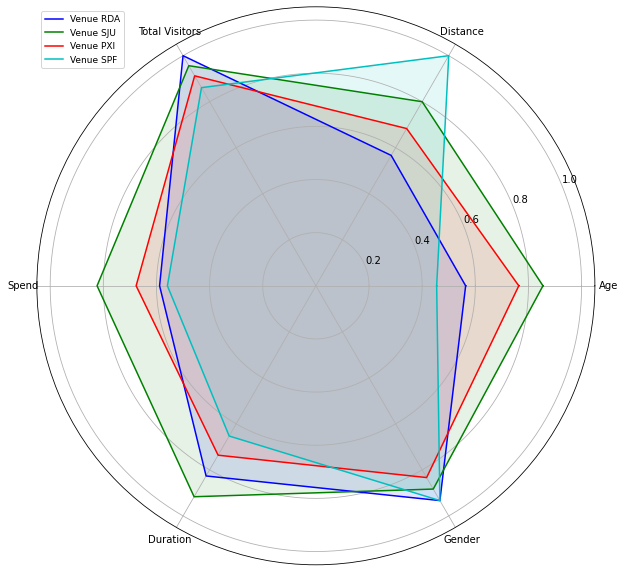

In [59]:
selected = ['RDA', 'SJU', 'PXI', 'SPF'] #lec6-4
n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(10, 15))
sub = plt.subplot(1, 1, 1, polar=True)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Venue ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=2,prop={'size': 9})
plt.show()

# **A Bubble Plot of Duration and Gender for Medium Volume Venues. It is intended to show the relationship between the bubble plot dimensions "Duration," "Total Visitors," and "Gender".**

No handles with labels found to put in legend.


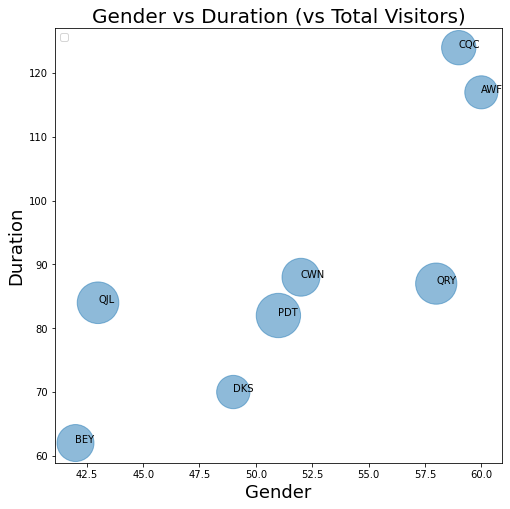

In [ ]:
#bubleplot for medium values
selected = ['PDT', 'QJL', 'QRY', 'CWN', 'BEY', 'CQC', 'DKS', 'AWF']
summary_data=summary_data.loc[selected]
summary_data['BubbleSize'] = summary_data['Total Visitors'] * 0.02

plt.figure(figsize=(8, 8))
plt.scatter(summary_data['Gender'], summary_data['Duration'], s=summary_data['BubbleSize'], alpha=0.5)
#plt.xticks([5, 20, 35, 40, 55])
#plt.yticks([54000, 75000, 100000, 125000, 150000])
plt.title('Gender vs Duration (vs Total Visitors)', fontsize=20)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Duration', fontsize=18)
for i, name in enumerate(summary_data.index):
    plt.annotate(name, (summary_data['Gender'][i], summary_data['Duration'][i]))
    #plt.annotate(f"{name} ({summary_data['Age'][i]:1f}s)",(summary_data['Distance'][i],summary_data['Total Visitors']))
#plt.plot([0, 50], [0, 50], linestyle=':', color='r', label='price = cost (zero profit)')
plt.legend(loc=2)
plt.show()

# **Installing libraries for the interactive graphs**

In [34]:
!pip install hvplot
import holoviews as hv
import hvplot.pandas

Output hidden; open in https://colab.research.google.com to view.

# **A Line Plot for High Volume Venues for fully exploring the analysed data.**

In [37]:
daily_visitors_data.index=pd.to_datetime(daily_visitors_data.index)
selected = ['RDA','SJU','PXI','SPF']

plot = daily_visitors_data[selected].hvplot.line(
    frame_height=200, frame_width=600,
    xlabel='Date', ylabel='Daily Visitors',
    title='High Volume Venues',
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    subplots=True
).cols(1)
hv.extension('bokeh')
plot

Output hidden; open in https://colab.research.google.com to view.

# **A Bubble Plot of Total Visitors and Distance.It is intended to show the relationship between the bubble plot dimensions "Total Visitors," "Distance" and "Age".**

In [36]:
summary_data['BubbleSize'] = summary_data['Age'] * 5

plot = summary_data.hvplot.scatter(
    frame_height=500, frame_width=500,
    title='Distance vs Total Visitors (vs Age)',
    xlabel='Distance', ylabel='Total Visitors',
    alpha=0.5, padding=0.1, hover_cols='all',
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    x='Distance', y='Total Visitors', size='BubbleSize'
)
hv.extension('bokeh')
plot

Output hidden; open in https://colab.research.google.com to view.